In [40]:
import pickle
import warnings
import pandas as pd
import seaborn as sns
from dataprep.eda import create_report

warnings.filterwarnings("ignore")

In [41]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,34.137687,57.4320,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,-0.988468,0.5,1.000000,0.951057,0.151428,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,33.794544,57.6810,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,-0.937752,0.5,0.623490,0.951057,0.347305,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,34.611011,57.4810,34.877,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,-0.848644,0.5,-0.222521,0.951057,0.528964,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,34.408304,57.4930,34.877,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,-0.724793,0.5,-0.900969,0.951057,0.688967,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,34.178922,56.7500,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,-0.571268,0.5,-0.900969,0.951057,0.820763,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,0.485302,0.5,-0.900969,0.809017,-0.874347,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,34.460723,51.3510,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,0.299363,0.5,-0.900969,0.809017,-0.954139,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3452,621e339967b776a240e502de,34.137341,50.5040,49.779,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.101168,0.5,-0.222521,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3453,621e339967b776a240e502de,34.406884,51.5330,45.322,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,-0.101168,0.5,0.623490,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE


drop the personality columns - just have fitbit data

In [42]:
data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'], inplace=True)

Add feature about how many different activity types each user does

In [43]:
users = list(data['id'].unique())
data['different_activity_types'] = ""
for user in users:
    different_types = 0
    user_data = data.loc[data['id'] == user]
    user_data = user_data.loc[:, 'Aerobic Workout':'Yoga/Pilates']
    cols = user_data.columns
    for col in cols:
        if 1.0 in user_data[col].values:
            different_types = different_types + 1
    data.loc[data['id'] == user, 'different_activity_types'] = different_types
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,different_activity_types
0,621e2e8e67b776a24055b564,34.137687,57.4320,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,0.0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,1
1,621e2e8e67b776a24055b564,33.794544,57.6810,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,0.0,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,1
2,621e2e8e67b776a24055b564,34.611011,57.4810,34.877,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,621e2e8e67b776a24055b564,34.408304,57.4930,34.877,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,0.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,1
4,621e2e8e67b776a24055b564,34.178922,56.7500,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,0.0,-0.866025,-0.433884,0.309017,-0.571268,0.5,-0.900969,0.951057,0.820763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,0.0,0.866025,0.433884,0.587785,0.485302,0.5,-0.900969,0.809017,-0.874347,7
3451,621e339967b776a240e502de,34.460723,51.3510,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,0.0,0.866025,-0.433884,0.587785,0.299363,0.5,-0.900969,0.809017,-0.954139,7
3452,621e339967b776a240e502de,34.137341,50.5040,49.779,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,7
3453,621e339967b776a240e502de,34.406884,51.5330,45.322,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,0.0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,7


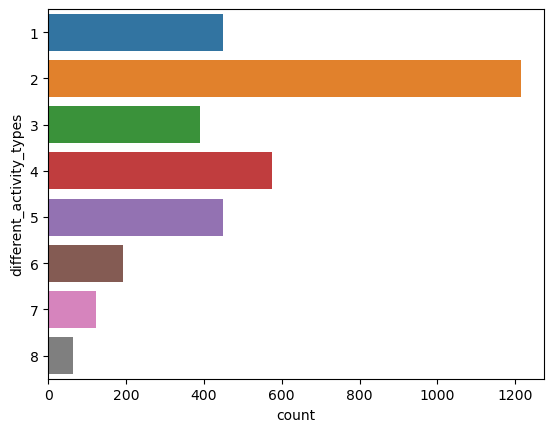

In [44]:
sns.countplot(y="different_activity_types", data=data)